In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.signal

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
ls 'gdrive/My Drive/left_fist.npy'

'gdrive/My Drive/left_fist.npy'


In [0]:
left_fist = np.load('gdrive/My Drive/left_fist.npy')
right_fist = np.load('gdrive/My Drive/right_fist.npy')
both_fist = np.load('gdrive/My Drive/both_fist.npy')
both_feet = np.load('gdrive/My Drive/both_feet.npy')

In [7]:
left_fist = np.array(left_fist[:530])
right_fist = np.array(right_fist[:530])
both_fist = np.array(both_fist)
both_feet = np.array(both_feet)
print(left_fist.shape)
print(right_fist.shape)
print(both_fist.shape)
print(both_feet.shape)

(530, 64, 113)
(530, 64, 113)
(530, 64, 113)
(530, 64, 113)


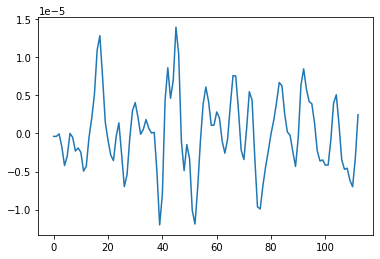

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


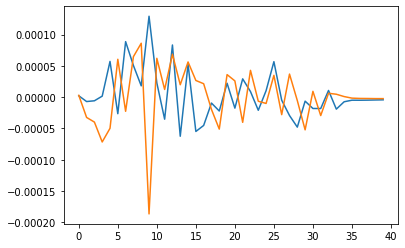

In [8]:
#plt.plot(left_fist[0][0])
#plt.show()
plt.plot(right_fist[0][0])
plt.show()
#plt.plot(np.fft.fft(both_fist[0][0])[:40])
plt.plot(np.fft.fft(left_fist[0][0])[:40])
plt.plot(np.fft.fft(right_fist[0][0])[:40])

#plt.plot(both_fist[0][0])
#plt.show()
#plt.plot(both_feet[0][0])

/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  .format(nperseg, input_length))
/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  .format(nperseg, input_length))


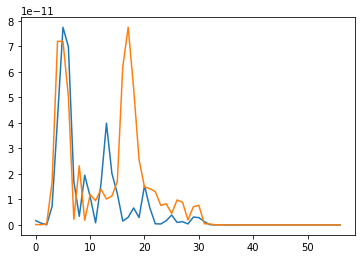

In [9]:
plt.plot(scipy.signal.welch(left_fist)[1][90][8])
plt.plot(scipy.signal.welch(right_fist)[1][90][8])
#plt.plot(both_fist[0][0])
#plt.plot(both_feet[0][0])

In [10]:
print(abs(np.sum(left_fist[0][0] - right_fist[0][0])))
print(abs(np.sum(left_fist[0][0] - both_fist[0][0])))
print(abs(np.sum(left_fist[0][0] - both_feet[0][0])))
print(abs(np.sum(both_feet[0][0] - both_fist[0][0])))

6.853359500868575e-07
1.6039158473338503e-05
3.0591367277883825e-05
1.4552208804545327e-05


In [0]:
events = np.zeros((2120,4))
ones = np.ones((530,))

In [0]:
# left fist
events[:530,0] = events[:530,0] + ones
# right fist
events[530:1060,1] = events[530:1060,1] + ones
# both fist 
events[1060:1590,2] = events[1060:1590,2] + ones
# both feet
events[1590:,3] = events[1590:,3] + ones

In [0]:
def preprocessing(data):
    mean = np.mean(data, axis = 0)    
    var = np.var(data, axis = 0)
    data = (data - mean)/var
    return data
#data_array = preprocessing(data)

In [14]:
# fast fourier transform
a = np.fft.fft(left_fist)[:,:,:40]
a.shape

(530, 64, 40)

In [0]:
f_left_fist = np.fft.fft(left_fist)[:,:,:40].real
f_left_fist = preprocessing(f_left_fist).reshape((530,2560))
f_right_fist = np.fft.fft(right_fist)[:,:,:40].real
f_right_fist = preprocessing(f_right_fist).reshape((530,2560))
f_both_fist = np.fft.fft(both_fist)[:,:,:40].real
f_both_fist = preprocessing(f_both_fist).reshape((530,2560))
f_both_feet = np.fft.fft(both_feet)[:,:,:40].real
f_both_feet = preprocessing(f_both_feet).reshape((530,2560))

In [16]:
print(f_left_fist.shape)
print(f_right_fist.shape)
print(f_both_fist.shape)
print(f_both_feet.shape)

(530, 2560)
(530, 2560)
(530, 2560)
(530, 2560)


In [17]:
fft_data = np.concatenate((f_left_fist, f_right_fist, f_both_fist, f_both_feet), axis = 0)
fft_data.shape

(2120, 2560)

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, Conv2D, LSTM
from tensorflow.keras.layers import MaxPooling1D, AveragePooling2D
from tensorflow.keras.layers import LeakyReLU, BatchNormalization
from tensorflow.keras import regularizers

In [19]:
x_train, x_test, y_train, y_test = train_test_split(fft_data, events, test_size=0.1, random_state=42)
x_train.shape

(1908, 2560)

In [0]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=(2560,)))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(120, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(120, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(4, activation='softmax'))


    # Compile model
    model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])
    return model

In [21]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               256100    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 120)               12120     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               14520     
_________________________________________________________________
batch_normalization_1 (Batch (None, 120)               4

In [22]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=300)

Epoch 1/300
60/60 [==============================] - 1s 9ms/step - loss: 1.7029 - acc: 0.2516 - val_loss: 1.4655 - val_acc: 0.2358
Epoch 2/300
60/60 [==============================] - 0s 5ms/step - loss: 1.5847 - acc: 0.2647 - val_loss: 1.4443 - val_acc: 0.2500
Epoch 3/300
60/60 [==============================] - 0s 5ms/step - loss: 1.4827 - acc: 0.2851 - val_loss: 1.4389 - val_acc: 0.2358
Epoch 4/300
60/60 [==============================] - 0s 5ms/step - loss: 1.4773 - acc: 0.2725 - val_loss: 1.4447 - val_acc: 0.2547
Epoch 5/300
60/60 [==============================] - 0s 5ms/step - loss: 1.4393 - acc: 0.2987 - val_loss: 1.4073 - val_acc: 0.2500
Epoch 6/300
60/60 [==============================] - 0s 5ms/step - loss: 1.3980 - acc: 0.3187 - val_loss: 1.4140 - val_acc: 0.2500
Epoch 7/300
60/60 [==============================] - 0s 5ms/step - loss: 1.3919 - acc: 0.3218 - val_loss: 1.4043 - val_acc: 0.3019
Epoch 8/300
60/60 [==============================] - 0s 5ms/step - loss: 1.3822 - a

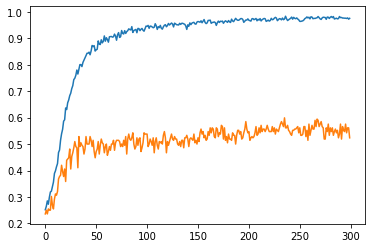

In [23]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

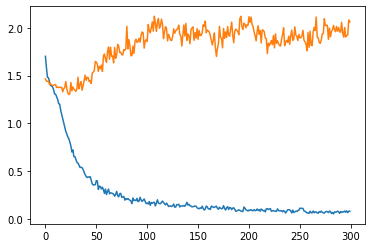

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [27]:
from sklearn.metrics import confusion_matrix
import tensorflow as tf
def result(x_test, y_test):
  y_pred = model.predict(x_test)
  y_classes = y_pred.argmax(axis=-1)
  label =  tf.keras.utils.to_categorical(np.asarray(y_classes)) 
  matrix = confusion_matrix(y_test.argmax(axis=1), label.argmax(axis=1))
  FP = np.sum(matrix.sum(axis=0) - np.diag(matrix))/4  
  FN = np.sum(matrix.sum(axis=1) - np.diag(matrix))/4
  TP = np.sum(np.diag(matrix))/4
  TN = np.sum(matrix.sum() - (FP + FN + TP))/4
  data = []
  # Overall accuracy
  accuracy = (TP+TN)/(TP+FP+FN+TN)
  data.append(accuracy)
  #Error
  error = (FP + FN)/(TP + TN + FN + FP)
  data.append(error)
  # Sensitivity, hit rate, recall, or true positive rate
  sensitivity = TP/(TP+FN)  
  data.append(sensitivity)
  # Specificity or true negative rate
  specificity = TN/(TN+FP)
  data.append(specificity)
  # Precision or positive predictive value
  precision = TP/(TP+FP)
  data.append(precision)
  # Fall out or false positive rate
  false_positive_rate = FP/(FP+TN)
  data.append(false_positive_rate)

  #F-score
  f_score = (2*(precision *sensitivity))/(precision  + sensitivity)
  data.append(f_score)
  # False discovery rate
  FDR = FP/(TP+FP)
  data.append(FDR)
  # Negative predictive value
  NPV = TN/(TN+FN)
  data.append(NPV)
  return data
test_results = result(x_test, y_test)
test_results

[0.5478455512031337,
 0.4521544487968663,
 0.5235849056603774,
 0.56975505857295,
 0.5235849056603774,
 0.43024494142705005,
 0.5235849056603774,
 0.47641509433962265,
 0.56975505857295]

In [29]:
train_results = result(x_train, y_train)
train_results

[0.9994011527808968,
 0.0005988472191032262,
 0.999475890985325,
 0.999301554042256,
 0.999475890985325,
 0.0006984459577440195,
 0.999475890985325,
 0.0005241090146750524,
 0.999301554042256]